<a href="https://colab.research.google.com/github/manlio99/VIBErgo/blob/master/Manlio_vibe_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIBE: Video Inference for Human Body Pose and Shape Estimation

Demo of the original PyTorch based implementation provided here: https://github.com/mkocabas/VIBE

## Note
Before running this notebook make sure that your runtime type is 'Python 3 with GPU acceleration'. Go to Edit > Notebook settings > Hardware Accelerator > Select "GPU".

## More Info
- Paper: https://arxiv.org/abs/1912.05656
- Repo: https://github.com/mkocabas/VIBE

In [1]:
from google.colab import drive
drive.mount('/content/drive')
##

Mounted at /content/drive


In [2]:
!git clone https://github.com/manlio99/vibe.git
%cd vibe/

Cloning into 'vibe'...
remote: Enumerating objects: 389, done.
remote: Counting objects: 100% (389/389), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 389 (delta 206), reused 382 (delta 203), pack-reused 0
Receiving objects: 100% (389/389), 15.07 MiB | 48.97 MiB/s, done.
Resolving deltas: 100% (206/206), done.
/content/vibe


In [3]:
# Install the other requirements
!pip install torch==1.4.0 numpy==1.17.5
#!pip install git+https://github.com/giacaglia/pytube.git --upgrade
!pip install -r requirements.txt

     |████████████████████████████████| 753.4MB 23kB/s 
     |████████████████████████████████| 20.0MB 1.3MB/s 
ERROR: torchvision 0.9.0+cu101 has requirement torch==1.8.0, but you'll have torch 1.4.0 which is incompatible.
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.4.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.17.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


  Cloning https://github.com/mattloper/chumpy.git to /tmp/pip-req-build-z2rba9j6
  Running command git clone -q https://github.com/mattloper/chumpy.git /tmp/pip-req-build-z2rba9j6
  Cloning https://github.com/mkocabas/yolov3-pytorch.git to /tmp/pip-req-build-3m13w9ef
  Running command git clone -q https://github.com/mkocabas/yolov3-pytorch.git /tmp/pip-req-build-3m13w9ef
  Cloning https://github.com/mkocabas/multi-person-tracker.git to /tmp/pip-req-build-81m9_jah
  Running command git clone -q https://github.com/mkocabas/multi-person-tracker.git /tmp/pip-req-build-81m9_jah
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 3.7MB 26.6MB/s 
     |████████████████████████████████| 276kB 40.9MB/s 
     |████████████████████████████████| 296kB 44.7MB/s 
     |████████████████████████████████| 2.1MB 48.2MB/s 
     |████████████████████████████████| 409kB 52.8MB/s 
     |████████████████████████████████| 1.2MB 44.3MB/s 
     |████████████████████████

In [4]:
# Download pretrained weights and SMPL data
!source scripts/prepare_data.sh -y

Downloading...
From: https://drive.google.com/uc?id=1untXhYOLQtpNEy4GTY_0fL_H-k6cTf_r
To: /content/vibe/data/vibe_data.zip
561MB [00:08, 64.0MB/s]
Archive:  vibe_data.zip
   creating: vibe_data/
  inflating: vibe_data/smpl_mean_params.npz  
  inflating: vibe_data/vibe_model_w_3dpw.pth.tar  
  inflating: vibe_data/gmm_08.pkl    
  inflating: vibe_data/J_regressor_h36m.npy  
  inflating: vibe_data/vibe_model_wo_3dpw.pth.tar  
  inflating: vibe_data/SMPL_NEUTRAL.pkl  
  inflating: vibe_data/J_regressor_extra.npy  
  inflating: vibe_data/spin_model_checkpoint.pth.tar  
  inflating: vibe_data/sample_video.mp4  
  inflating: vibe_data/yolov3.weights  


Install STAF

In [5]:
#STAF is not working yet
"""import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/manlio99/staf.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone STAF
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' staf/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build STAF
  !cd staf && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo"""


"import os\nfrom os.path import exists, join, basename, splitext\n\ngit_repo_url = 'https://github.com/manlio99/staf.git'\nproject_name = splitext(basename(git_repo_url))[0]\nif not exists(project_name):\n  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949\n  # install new CMake becaue of CUDA10\n  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz\n  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local\n  # clone STAF\n  !git clone -q --depth 1 $git_repo_url\n  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\\/3rdparty\\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\\/3rdparty\\/caffe)/g' staf/CMakeLists.txt\n  # install system dependencies\n  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-de

In [6]:
#not working yet
# example demo usage
#!cd /content/vibe/staf/openpose && /content/vibe/staf/openpose/build/examples/openpose/openpose.bin --video /content/vibe/staf/openpose/examples/media/video.avi --write_json output/ --display 0 --render_pose 0


In [7]:
#%cd /content/staf
#!python3 /content/staf/build/examples/tutorial_api_python/02_whole_body_from_image.py

In [8]:
#!python -m pip uninstall pytube pytube3 pytubex pytube4 -y
!python -m pip install pytube

     |████████████████████████████████| 51kB 7.1MB/s 


In [9]:
#%cd /content/vibe/staf/models
#!ls
#!sh getModels.sh


In [10]:
%cd /content/vibe
# Run the demo
!python demo.py --vid_file sample_video.mp4 --output_folder output/ --tracking_method bbox #--staf_dir /content/staf

# You may use --sideview flag to enable from a different viewpoint, note that this doubles rendering time.
# !python demo.py --vid_file sample_video.mp4 --output_folder output/ --sideview

# You may also run VIBE on a YouTube video by providing a link
#!python demo.py --vid_file https://www.youtube.com/watch?v=GLwRHyx7xYE --output_folder output/ --tracking_method pose --display

/content/vibe
Running "ffmpeg -i sample_video.mp4 -f image2 -v error /tmp/sample_video_mp4/%06d.png"
Images saved to "/tmp/sample_video_mp4"
Input video number of frames 300
--2021-03-12 20:39:04--  https://raw.githubusercontent.com/mkocabas/yolov3-pytorch/master/yolov3/config/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8338 (8.1K) [text/plain]
Saving to: ‘/root/.torch/config/yolov3.cfg’

yolov3.cfg          100%[===================>]   8.14K  --.-KB/s    in 0s      

2021-03-12 20:39:04 (88.9 MB/s) - ‘/root/.torch/config/yolov3.cfg’ saved [8338/8338]

Running Multi-Person-Tracker
100% 25/25 [00:18<00:00,  1.44it/s]
Finished. Detection + Tracking FPS 16.39
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache

In [11]:
#STAF is not working yet
#!python demo.py --vid_file sample_video.mp4 --output_folder output/ --tracking_method pose --display

In [12]:
# Play the generated video
from IPython.display import HTML
from base64 import b64encode

def video(path):
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML('<video width=500 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

video('output/sample_video/sample_video_vibe_result.mp4')

In [13]:
# Inspect the output file content
import joblib
output = joblib.load('output/sample_video/vibe_output.pkl')
print('Track ids:', output.keys(), end='\n\n')
pathdata='output/sample_video/vibe_output.pkl'

print('VIBE output file content:', end='\n\n')
for k,v in output[1].items():
  if k == 'joints2d': 
    print(k)
  else: 
    print(k, v.shape)

Track ids: dict_keys([1])

VIBE output file content:

pred_cam (300, 3)
orig_cam (300, 4)
verts (300, 6890, 3)
pose (300, 72)
betas (300, 10)
joints3d (300, 49, 3)
joints2d
joints2d_img_coord (300, 49, 2)
bboxes (300, 4)
frame_ids (300,)


In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt



### Change Score Survey



Not implemented yet!

In [15]:
#@title Right Wrist { display-mode: "form" }
#@markdown select +1 if flexion or extension movements are 0°-15° 

#@markdown Select: +2 if flexion or extension movements are >15° 
RightWristScore = 2 #@param [1, 2]
print('You selected', RightWristScore)

You selected 2


In [16]:
#@title Right Wrist deviated or twisted{ display-mode: "form" }
#@markdown Select: +1 if wrist is deviated or twisted OR 

#@markdown Select: +0 if not 
RightWristchange = 1 #@param [0, 1]
print('You selected', RightWristchange)
RightWristScore+= RightWristchange

You selected 1


In [17]:
#@title Left Wrist { display-mode: "form" }
#@markdown Select: +1 if flexion or extension movements are 0°-15°;

#@markdown Select: +2 if flexion or extension movements are >15° 
LeftWristScore = 2 #@param [1, 2]
print('You selected', LeftWristScore)

You selected 2


In [18]:
#@title Left Wrist deviated or twisted{ display-mode: "form" }
#@markdown select: +1 if Left wrist is deviated or twisted

#@markdown Select: +0 if Left wrist is not deviated or twisted
LeftWristchange = 1 #@param [0, 1]
print('You selected', LeftWristchange)
LeftWristScore+= LeftWristchange

You selected 1


In [19]:
#@title Trunk twisted or side flexed { display-mode: "form" }
#@markdown Select: +1 if Trunk is twisted or side flexed; 

#@markdown Select: +0 if Trunk is not twisted or side flexed
Trunkchange = 0 #@param [0, 1]
print('You selected', Trunkchange)

You selected 0


In [20]:
#@title Neck twisted or side flexed { display-mode: "form" }
#@markdown Select: +1 if Neck is twisted or side flexed

#@markdown Select: +0 if Neck is not twisted or side flexed
Neckchange = 0 #@param [0, 1]
print('You selected', Neckchange)

You selected 0


In [21]:
#@title Legs Balance { display-mode: "form" }
#@markdown Select: +1 if Bilateral weight bearing, walking or sitting

#@markdown Select: +2 Unilateral weight bearing, Feather weight bearing or an unstable posture
Legschange = 1 #@param [1, 2]
print('You selected', Legschange)

You selected 1


In [22]:
#@title Left Shoulder { display-mode: "form" }
#@markdown Select: +1 if Left shoulder is raised

#@markdown Select: -1 if Left shoulder is leaning or if Left shoulder posture is gravity assisted.

#@markdown Else Select: 0
LeftShoulderchange = 0 #@param [1, -1, 0]
print('You selected', LeftShoulderchange)

You selected 0


In [23]:
#@title Right Shoulder { display-mode: "form" }
#@markdown Select: +1 if Right shoulder is raised

#@markdown Select: -1 if Right shoulder is leaning or if Right shoulder posture is gravity assisted.

#@markdown Else Select: 0
RightShoulderchange = 0 #@param [1, -1, 0]
print('You selected', RightShoulderchange)

You selected 0


In [24]:
    def uuuuu( a, b, c ):
        #angles calculation, the formulae can be edited.
        a = np.array(a)
        b = np.array(b)
        c = np.array(c)

        ba = a - b
        bc = c - b

        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)

        return np.degrees(angle)

In [25]:
def reba(leftelbowScore, rightelbowScore, leftShoulderScore, rightShoulderScore, leftKneeScore, rightKneeScore,
                                                                 trunkScore, neckScore,LeftWristScore=3, RightWristScore=3 ):
        if leftelbowScore>=2:
            leftelbowScore=2
        if rightelbowScore>=2:
            rightelbowScore=2
        if leftShoulderScore>=6:
            leftShoulderScore=6
        elif leftShoulderScore < 1:
            leftShoulderScore = 1

        if rightShoulderScore>=6:
            rightShoulderScore=6
        elif rightShoulderScore < 1:
            rightShoulderScore = 1

        if leftKneeScore>=4:
            leftKneeScore=4
        elif leftKneeScore <1:
            leftKneeScore= 1

        if rightKneeScore >= 4:
            rightKneeScore = 4
        elif rightKneeScore < 1:
            rightKneeScore = 1

        if neckScore>=3:
            neckScore=3
        elif neckScore < 1:
            neckScore = 1
        if trunkScore >= 5:
            trunkScore = 5
        elif trunkScore < 1:
            trunkScore=1

        table_a=[[1],[],[],[]]
        table_a[1]=[
           [] ,#python start lists with 0, and REBA starts from 1
           [ 1, 2, 3, 4],
           [ 2, 3, 4, 5],
           [ 2, 4, 5, 6],
           [ 3, 5, 6, 7],
           [ 4, 6, 7, 8]]

        table_a[2] = [
            [1],#python start lists with 0, and REBA starts from 1
            [1, 2, 3, 4],
            [3, 4, 5, 6],
            [ 4, 5, 6, 7],
            [ 5, 6, 7, 8],
            [ 6, 7, 8, 9]
        ]

        table_a[3] = [
            [1],#python start lists with 0, and REBA starts from 1
           [3, 3, 5, 6],
           [4, 5, 6, 7],
           [5, 6, 7, 8],
           [6, 7, 8, 9]]

        #python start lists with 0, and REBA starts from 1: so we rest 1 to horizontal scores
        Left_res_table_a = table_a[neckScore][trunkScore][leftKneeScore-1]
        Right_res_table_a = table_a[neckScore][trunkScore][rightKneeScore-1]

        table_b=[[1],[],[]]
        table_b[1]=[#ojo restar 1 a los indices horizontales

            [ 1, 2, 2],
            [ 1, 2, 3],
            [ 3, 4, 5],
            [ 4, 5, 5],
            [ 6, 7, 8],
            [ 7, 8, 8]]

        table_b[2] = [

            [1, 2, 3],
            [2, 3, 4],
            [4, 5, 5],
            [5, 6, 7],
            [7, 8, 8],
            [8, 9, 9]]

        Left_res_table_b = table_b[leftelbowScore][leftShoulderScore-1][LeftWristScore-1]
        
        Right_res_table_b = table_b[rightelbowScore][rightShoulderScore-1][RightWristScore-1]
        
        table_c=[

            [1, 1, 1, 2, 3, 3, 4, 5, 6, 7, 7, 7],
            [1, 2, 2, 3, 4, 4, 5, 6, 6, 7, 7, 8],
            [2, 3, 3, 3, 4, 5, 6, 7, 7, 8, 8, 8],
            [3, 4, 4, 4, 5, 6, 7, 8, 8, 9, 9, 9],
            [4, 4, 4, 5, 6, 7, 8, 8, 9, 9, 9, 9],
            [6, 6, 6, 7, 8, 8, 9, 9, 10, 10, 10, 10],
            [7, 7, 7, 8, 9, 9, 9, 10, 10, 11, 11, 11],
            [8, 8, 8, 9, 10, 10, 10, 10, 10, 11, 11, 11],
            [9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12],
            [10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
            [11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12],
            [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
        ]
        #python start lists with 0, and REBA starts from 1: so we rest 1 to scores
        Left_res_table_c = table_c[Left_res_table_a-1][Left_res_table_b-1]
        Right_res_table_c = table_c[Right_res_table_a-1][Right_res_table_b-1]
        return (Left_res_table_a,Left_res_table_b,Left_res_table_c, Right_res_table_a, Right_res_table_b, Right_res_table_c)

# skeleton detected
dict_keys([0])
0
0
0
0


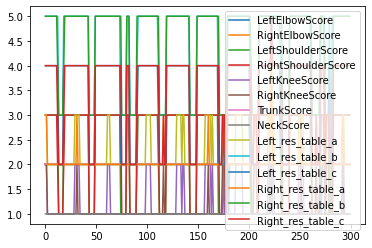

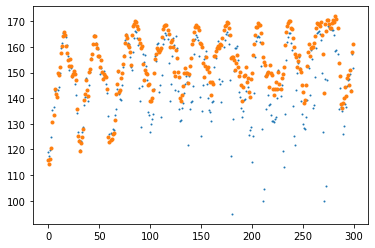

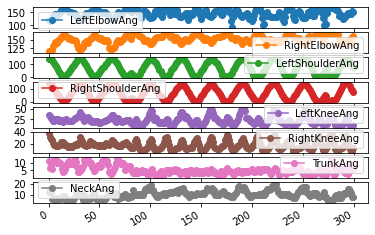

In [26]:
pathdata='/content/drive/MyDrive/Colab Notebooks/VIBE_VIENA/vibe_output.pkl'
path_folder2="/content/drive/MyDrive/Colab Notebooks/VIBE_VIENA/"
output_multiple_skeleton = joblib.load(pathdata)

acumleftelbowAng, acumrightelbowAng, acumneckTwistingAng, acumleftShoulderAng, acumrightShoulderAng, acumtrunkTwistingAng, acumleftKneeAng, acumrightKneeAng, acumleftEarAng, acumrightEarAng, acumleftpieAng, acumrightpieAng, acumnoseAng, acumtrunkAng, acumneckAng, acumleftShoulderAng2, acumrightShoulderAng2, acumtrunkTwistingAng2, acumtrunkBendingAng = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

confleftelbowAng, confrightelbowAng, confneckTwistingAng, confleftShoulderAng, confrightShoulderAng, conftrunkTwistingAng, confleftKneeAng, confrightKneeAng, confleftEarAng, confrightEarAng, confleftpieAng, confrightpieAng, confnoseAng, conftrunkAng, confneckAng, confleftShoulderAng2, confrightShoulderAng2, conftrunkTwistingAng2, conftrunkBendingAng = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

sololeftelbowAng, solorightelbowAng, soloneckTwistingAng, sololeftShoulderAng, solorightShoulderAng, solotrunkTwistingAng, sololeftKneeAng, solorightKneeAng, sololeftEarAng, solorightEarAng, sololeftpieAng, solorightpieAng, solonoseAng, solotrunkAng, soloneckAng, sololeftShoulderAng2, solorightShoulderAng2, solotrunkTwistingAng2, solotrunkBendingAng = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

scoreleftelbowAng, scorerightelbowAng, scoreneckTwistingAng, scoreleftShoulderAng, scorerightShoulderAng, scoretrunkTwistingAng, scoreleftKneeAng, scorerightKneeAng, scoreleftEarAng, scorerightEarAng, scoreleftpieAng, scorerightpieAng, scorenoseAng, scoretrunkAng, scoreneckAng, scoreleftShoulderAng2, scorerightShoulderAng2, scoretrunkTwistingAng2, scoretrunkBendingAng = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

Left_res_table_a, Left_res_table_b, Left_res_table_c, Right_res_table_a, Right_res_table_b, Right_res_table_c, =[],[],[],[],[],[]
print("# skeleton detected")
print(output_multiple_skeleton.keys())  # dict_keys([1, 2, 3, 4])   these are the track ids for each subject appearing in the video

for kk in output_multiple_skeleton.keys():
    #for multiple skeleton detected
    output= output_multiple_skeleton[kk]
    arr = [dat for dat in output['joints3d']]
    arr2d = [dat for dat in output['joints2d']]
    #t = len(arr) #temporal line
    datab = []
    for j in range(len(arr)):
        leftShoulder = arr[j][2]
        leftelbow = arr[j][3]
        lefthand = arr[j][4]

        rightShoulder = arr[j][5]
        rightelbow = arr[j][6]
        righthand = arr[j][7]

        nose = arr[j][0]
        neck = arr[j][1]
        leftShoulder = leftShoulder

        leftHip = arr[j][9]
        centerHip = arr[j][8]
        neck = neck

        leftHip = leftHip
        leftKnee = arr[j][10]
        leftpie = arr[j][11]

        rightHip = arr[j][12]
        rightKnee = arr[j][13]
        rightpie = arr[j][14]

        leftelbow = leftelbow
        leftShoulder = leftShoulder
        leftHip = leftHip

        rightelbow = rightelbow
        rightShoulder = rightShoulder
        rightHip = rightHip

        leftEar = arr[j][17]
        neck = neck
        leftShoulder = leftShoulder

        rightEar = arr[j][18]
        neck = neck
        rightShoulder = rightShoulder

        leftKnee = leftKnee
        leftpie = leftpie
        leftpiefin = arr[j][22]

        rightKnee = rightKnee
        rightpie = rightpie
        rightpiefin = arr[j][19]

        nose2d = arr2d[j][0]
        neck2d = arr2d[j][1]
        leftShoulder2d = arr2d[j][2]
        leftelbow2d = arr2d[j][3]
        lefthand2d = arr2d[j][4]

        rightShoulder2d = arr2d[j][5]
        rightelbow2d = arr2d[j][6]
        righthand2d = arr2d[j][7]
        centerHip2d = arr2d[j][8]
        leftHip2d = arr2d[j][9]
        leftKnee2d = arr2d[j][10]
        leftpie2d = arr2d[j][11]
        rightHip2d = arr2d[j][12]
        rightKnee2d = arr2d[j][13]
        rightpie2d = arr2d[j][14]
        leftEar2d = arr2d[j][17]
        rightEar2d = arr2d[j][18]

        if leftKnee[2]:
            if rightKnee[2]:
                #promKnee is used to calculate the hip ang.
                # promKnee is the middle point of the knees.

                promKnee = [float((leftKnee[0] + rightKnee[0]) / 2),
                                float((leftKnee[1] + rightKnee[1]) / 2),
                                float((leftKnee[2] + rightKnee[2]) / 2)]
                promKnee2d = leftKnee2d[2] * rightKnee2d[2]
            else:
                ppromKnee2d = leftKnee2d[2]
                pass

        else:
            if rightKnee[2] > 0.1:
                promKnee2d = rightKnee2d[2]
                pass

            else:
                promKnee = [0, 0, 0]
                promKnee2d = [0]

        centerHip = centerHip
        neck = neck
        if leftEar[2]:
            if rightEar[2]:
                #promEar is used to calculate the neck ang.
                # promEar is the middle point of the ears.
                promEar = (float((leftEar[0] + rightEar[0]) / 2), float((leftEar[1] + rightEar[1]) / 2),
                            float((leftEar[2] + rightEar[2]) / 2))
                promEar2d = leftEar2d[2] * rightEar2d[2]
            else:
                promEar = leftEar
                promEar2d = leftEar2d
        else:
            if rightEar[2]:
                promEar = rightEar
                promEar2d = rightEar2d
            else:
                promEar = [0, 0, 0]
                promEar2d = [0]

        leftelbowAng = uuuuu(leftShoulder, leftelbow, lefthand)  # abs()180 -
        rightelbowAng = uuuuu(righthand, rightelbow, rightShoulder)  #abs() 180 -
        neckTwistingAng = uuuuu(nose, neck, centerHip)
        leftShoulderAng = uuuuu(leftelbow, leftShoulder, leftHip) - 15
        rightShoulderAng = uuuuu(rightelbow, rightShoulder, rightHip) - 15
        leftKneeAng = abs(180 - uuuuu(leftHip, leftKnee, leftpie))
        rightKneeAng = abs(180 - uuuuu(rightHip, rightKnee, rightpie))
        leftEarAng = uuuuu(leftEar, neck, leftShoulder)
        rightEarAng = uuuuu(rightEar, neck, rightShoulder)
        leftpieAng = 90 - uuuuu(leftKnee, leftpie, leftpiefin)
        rightpieAng = 90 - uuuuu(rightKnee, rightpie, rightpiefin)
        noseAng = uuuuu(nose, neck, leftShoulder)
        trunkAng = abs(180 - uuuuu(neck, centerHip, promKnee))
        neckAng = abs(180 - uuuuu(promEar, neck, centerHip))
        leftShoulderAng2 = uuuuu(leftelbow, leftShoulder, neck)
        rightShoulderAng2 = uuuuu(rightelbow, rightShoulder, neck)
        trunkTwistingAng = uuuuu(leftShoulder, centerHip, leftHip)
        trunkTwistingAng2 = uuuuu(rightShoulder, centerHip, rightHip)
        trunkBendingAng = uuuuu(leftHip, centerHip, neck)

        leftelbowAng2d = leftShoulder2d[2] * leftelbow2d[2] * lefthand2d[2]
        rightelbowAng2d = righthand2d[2] * rightelbow2d[2] * rightShoulder2d[2]
        neckTwistingAng2d = nose2d[2] * neck2d[2] * centerHip2d[2]
        leftShoulderAng2d = leftelbow2d[2] * leftShoulder2d[2] * leftHip2d[2]
        rightShoulderAng2d = rightelbow2d[2] * rightShoulder2d[2] * rightHip2d[2]
        leftKneeAng2d = leftHip2d[2] * leftKnee2d[2] * leftpie2d[2]
        rightKneeAng2d = rightHip2d[2] * rightKnee2d[2] * rightpie2d[2]
        leftEarAng2d = leftEar2d[2] * neck2d[2] * leftShoulder2d[2]
        rightEarAng2d = rightEar2d[2] * neck2d[2] * rightShoulder2d[2]
        noseAng2d = nose2d[2] * neck2d[2] * leftShoulder2d[2]
        trunkAng2d = neck2d[2] * centerHip2d[2] * promKnee2d
        neckAng2d = promEar2d * neck2d[2] * centerHip2d[2]
        leftShoulderAng22d = leftelbow2d[2] * leftShoulder2d[2] * neck2d[2]
        rightShoulderAng22d = rightelbow2d[2] * rightShoulder2d[2] * neck2d[2]
        trunkTwistingAng2d = leftShoulder2d[2] * centerHip2d[2] * leftHip2d[2]
        trunkTwistingAng22d = rightShoulder2d[2] * centerHip2d[2] * rightHip2d[2]
        trunkBendingAng2d = leftHip2d[2] * centerHip2d[2] * neck2d[2]

        negro = "black"  # (0, 0, 0)
        rojo = "red"  # (0, 0, 1)
        amarillo = "yellow"  # (0, 0, 1)
        verde = "green"  # (0, 1, 0)
        azul = "blue"  # (1, 0, 0)
        colorlist = [azul, verde, amarillo, rojo, negro]
        try:

            if not np.isnan(rightelbowAng):
                # rightelbowAng = uuuuu(righthand , rightelbow, rightShoulder)
                if 60 < rightelbowAng < 100:
                    rightelbowAngcolor = verde  #
                    rightelbowScore = 1
                else:
                    rightelbowAngcolor = rojo  #
                    rightelbowScore = 2
                # rightelbowAng_color = lineaa(img, righthand, rightelbow, rightShoulder, width, height, color)

            if not np.isnan(leftelbowAng):
                if 60 < leftelbowAng < 100:
                    leftelbowAngcolor = verde  # 1
                    leftelbowScore = 1
                else:
                    leftelbowAngcolor = rojo  # 2
                    leftelbowScore = 2
                ##img = lineaa(img, lefthand, leftelbow, leftShoulder, width, height, color)

            rightKneeScore=Legschange
            if not np.isnan(rightKneeAng):
                if (30 < rightKneeAng < 60):
                    rightKneeScore += 1 
                elif (rightKneeAng >= 60):
                    rightKneeScore += 2
            rightKneeAngcolor = colorlist[rightKneeScore]
                ##img = lineaa(img, rightHip, rightKnee, rightpie, width, height, color)

            leftKneeScore=Legschange
            if not np.isnan(leftKneeAng):
                if (30 < leftKneeAng < 60):
                    leftKneeScore += 1 
                elif (leftKneeAng >= 60):
                    leftKneeScore += 2
            leftKneeAngcolor = colorlist[leftKneeScore]
                ##img = lineaa(img, leftHip, leftKnee, leftpie, width, height, color)

            if not np.isnan(leftShoulderAng):
                jcol = 0
                if -20 < leftShoulderAng < 20:
                    jcol += 1
                elif leftShoulderAng < -20:
                    jcol += 2
                elif 20 < leftShoulderAng < 45:
                    jcol += 2
                elif 45 < leftShoulderAng < 90:
                    jcol += 3
                elif 90 < leftShoulderAng:
                    jcol += 4
                #+1 is the arm is abducted
                if leftShoulderAng2 > 140:
                    
                    jcol += 1
                else:
                    jcol += 0
                    
                if jcol > 3:
                    jcol = 3
                leftShoulderAngcolor = colorlist[jcol+ LeftShoulderchange]
                leftShoulderScore = jcol+LeftShoulderchange
                

            if not np.isnan(rightShoulderAng):
                jcol = 0
                if -20 < rightShoulderAng < 20:
                    jcol += 1
                elif rightShoulderAng < -20:
                    jcol += 2
                elif 20 < rightShoulderAng < 45:
                    jcol += 2
                elif 45 < rightShoulderAng < 90:
                    jcol += 3
                elif 90 < rightShoulderAng:
                    jcol += 4
                # +1 is the arm is abducted
                if not np.isnan(rightShoulderAng2) and rightShoulderAng2 > 140:
                    
                    jcol += 1
                else:
                    jcol += 0
                    
                if jcol > 3:
                    jcol = 3
                rightShoulderAngcolor = colorlist[jcol+ RightShoulderchange]
                rightShoulderScore = jcol + RightShoulderchange
                # img = lineaa(img, rightelbow, rightShoulder, rightHip, width, height, color)
            
            neckScore = 0
            neckScore+=Neckchange

            if (0 < neckAng < 20):
                neckScore += 1
            elif (10 < neckAng < 60):
                neckScore += 2
            """

            if abs(neckTwistingAng) > 5:
                neckScore += 1
            leftNeckBendingAng=20
            rightNeckBendingAng=0
            if abs(np.nanmean([leftNeckBendingAng,rightNeckBendingAng]) - 90) > 5:
                neckScore += 1"""
            if not np.isnan(neckAng):
                if neckScore >= 3:
                    neckAngcolor = rojo
                elif neckScore >= 2:
                    neckAngcolor = amarillo
                elif neckScore >= 0:
                    neckAngcolor = verde

            trunkScore = 0
            trunkScore+=Trunkchange
            if (trunkAng) < 1:
                trunkScore += 1
            elif (1 < (trunkAng) < 20):
                trunkScore += 2
            elif (20 < (trunkAng) < 60):
                trunkScore += 3
            elif (60 < (trunkAng)):
                trunkScore += 4
            """

            if np.nanmean([trunkTwistingAng, trunkTwistingAng2]) > 80:
                trunkScore += 1

            if (85 < trunkBendingAng > 95):
                trunkScore += 1"""
            if not np.isnan(trunkAng):
                if trunkScore >= 5:
                    trunkcolor = rojo
                elif trunkScore >= 3:
                    trunkcolor = amarillo
                elif trunkScore >= 0:
                    trunkcolor = verde
        except:
            print(Exception)
        
        confleftelbowAng.append(leftelbowAng2d)
        confrightelbowAng.append(rightelbowAng2d)
        confleftShoulderAng.append(leftShoulderAng2d)
        confrightShoulderAng.append(rightShoulderAng2d)
        confleftKneeAng.append(leftKneeAng2d)
        confrightKneeAng.append(rightKneeAng2d)
        conftrunkAng.append(trunkAng2d)
        confneckAng.append(neckAng2d)

        scoreleftelbowAng.append(leftelbowScore)
        scorerightelbowAng.append(rightelbowScore)
        scoreleftShoulderAng.append(leftShoulderScore)
        scorerightShoulderAng.append(rightShoulderScore)
        scoreleftKneeAng.append(leftKneeScore)
        scorerightKneeAng.append(rightKneeScore)
        scoretrunkAng.append(trunkScore)
        scoreneckAng.append(neckScore)

        Left_table_a, Left_table_b, Left_table_c, Right_table_a, Right_table_b, Right_table_c = reba(leftelbowScore, rightelbowScore, leftShoulderScore,
              rightShoulderScore, leftKneeScore, rightKneeScore, trunkScore, neckScore, LeftWristScore, RightWristScore)
         
        Left_res_table_a.append(Left_table_a)
        Left_res_table_b.append(Left_table_b)
        Left_res_table_c.append(Left_table_c)
        Right_res_table_a.append(Right_table_a)
        Right_res_table_b.append(Right_table_b)
        Right_res_table_c.append(Right_table_c)

        sololeftelbowAng.append(leftelbowAng)
        solorightelbowAng.append(rightelbowAng)
        sololeftShoulderAng.append(leftShoulderAng)
        solorightShoulderAng.append(rightShoulderAng)
        sololeftKneeAng.append(leftKneeAng)
        solorightKneeAng.append(rightKneeAng)
        solotrunkAng.append(trunkAng)
        soloneckAng.append(neckAng)

        acumleftelbowAng.append([leftelbowAng, (lefthand, leftelbow, leftShoulder), leftelbowAngcolor])
        acumrightelbowAng.append([rightelbowAng, (righthand, rightelbow, rightShoulder), rightelbowAngcolor])
        acumneckTwistingAng.append([neckTwistingAng, (nose, neck, centerHip)])
        acumleftShoulderAng.append([leftShoulderAng, (leftelbow, leftShoulder, leftHip), leftShoulderAngcolor])
        acumrightShoulderAng.append([rightShoulderAng, (rightelbow, rightShoulder, rightHip), rightShoulderAngcolor])
        acumtrunkTwistingAng.append([trunkTwistingAng, (leftShoulder, centerHip, leftHip)])
        acumleftKneeAng.append([leftKneeAng, (leftHip, leftKnee, leftpie), leftKneeAngcolor])
        acumrightKneeAng.append([rightKneeAng, (rightHip, rightKnee, rightpie), rightKneeAngcolor])
        acumleftEarAng.append([leftEarAng, (leftEar, neck, leftShoulder)])
        acumrightEarAng.append([rightEarAng, (rightEar, neck, rightShoulder)])
        acumleftpieAng.append([leftpieAng, (leftKnee, leftpie, leftpiefin)])
        acumrightpieAng.append([rightpieAng, (rightKnee, rightpie, rightpiefin)])
        acumnoseAng.append([noseAng, (nose, neck, leftShoulder)])
        acumtrunkAng.append([trunkAng, (neck, centerHip), trunkcolor])  # , promKnee
        acumneckAng.append([neckAng, (promEar, neck), neckAngcolor])  # , centerHip
        acumleftShoulderAng2.append([leftShoulderAng2, (leftelbow, leftShoulder, neck), leftShoulderAngcolor])
        acumrightShoulderAng2.append([rightShoulderAng2, (rightelbow, rightShoulder, neck), rightShoulderAngcolor])
        acumtrunkTwistingAng2.append([trunkTwistingAng2, (rightShoulder, centerHip, rightHip)])
        acumtrunkBendingAng.append([trunkBendingAng, (leftHip, centerHip, neck)])


        """
        datab.append(
            [leftelbowAng, rightelbowAng, neckTwistingAng, leftShoulderAng, rightShoulderAng, trunkTwistingAng,
              leftKneeAng, rightKneeAng, leftEarAng, rightEarAng, leftpieAng, rightpieAng,
              noseAng, trunkAng, neckAng, leftShoulderAng2, rightShoulderAng2, trunkTwistingAng2,
              trunkBendingAng])
    print(datab)
    return datab"""
    print("0")
    dfff = pd.DataFrame(
        list(zip(sololeftelbowAng, solorightelbowAng, sololeftShoulderAng, solorightShoulderAng,
                  sololeftKneeAng, solorightKneeAng, solotrunkAng, soloneckAng
                  # ,confleftelbowAng, confrightelbowAng, confleftShoulderAng,
                  # confrightShoulderAng,
                  # confleftKneeAng, confrightKneeAng, conftrunkAng,
                  # confneckAng
                  )),
        columns=['LeftElbowAng', 'RightElbowAng', 'LeftShoulderAng', 'RightShoulderAng',
                  'LeftKneeAng', 'RightKneeAng', 'TrunkAng', 'NeckAng'
                  # ,'confleftelbowAng', 'confrightelbowAng', 'confleftShoulderAng', 'confrightShoulderAng',
                  # 'confleftKneeAng', 'confrightKneeAng', 'conftrunkAng', 'confneckAng'
                  ])
    pathhh = path_folder2 + "/Angs_0.csv"
    person_idd = "0"
    while (os.path.exists(pathhh)):
        person_idd = pathhh.split("_")[-1]
        person_idd = person_idd.split(".")[0]
        person_idd = str(int(person_idd) + 1)
        pathhh = path_folder2 + "Angs_" + str(person_idd) + ".csv"

    dfff.to_csv(pathhh)
    # stats_numeric = dfff.describe()
    # print(stats_numeric)

    dfffscore = pd.DataFrame(
        list(zip(scoreleftelbowAng, scorerightelbowAng, scoreleftShoulderAng,
                  scorerightShoulderAng,
                  scoreleftKneeAng, scorerightKneeAng, scoretrunkAng, scoreneckAng,
                  Left_res_table_a, Left_res_table_b, Left_res_table_c,
                 Right_res_table_a, Right_res_table_b, Right_res_table_c
                  )),
        columns=['LeftElbowScore', 'RightElbowScore', 'LeftShoulderScore', 'RightShoulderScore',
                  'LeftKneeScore', 'RightKneeScore', 'TrunkScore', 'NeckScore',
                 "Left_res_table_a", "Left_res_table_b", "Left_res_table_c",
                  "Right_res_table_a", "Right_res_table_b", "Right_res_table_c"
                  ])
    

                  # ,confleftelbowAng, confrightelbowAng, confleftShoulderAng,
                  # confrightShoulderAng,
                  # confleftKneeAng, confrightKneeAng, conftrunkAng,
                  # confneckAng

                  # ,'confleftelbowAng', 'confrightelbowAng', 'confleftShoulderAng', 'confrightShoulderAng',
                  # 'confleftKneeAng', 'confrightKneeAng', 'conftrunkAng', 'confneckAng'

    dfffscore.to_csv(path_folder2 + "/score_" + str(person_idd) + ".csv")
    print("0")

    dfffconf = pd.DataFrame(
        list(zip(confleftelbowAng, confrightelbowAng, confleftShoulderAng, confrightShoulderAng,
                  confleftKneeAng, confrightKneeAng, conftrunkAng, confneckAng
                  # ,confleftelbowAng, confrightelbowAng, confleftShoulderAng,
                  # confrightShoulderAng,
                  # confleftKneeAng, confrightKneeAng, conftrunkAng,
                  # confneckAng
                  )),
        columns=['LeftElbowconf', 'RightElbowconf', 'LeftShoulderconf', 'RightShoulderconf',
                  'LeftKneeconf', 'RightKneeconf', 'Trunkconf', 'Neckconf'
                  # ,'confleftelbowAng', 'confrightelbowAng', 'confleftShoulderAng', 'confrightShoulderAng',
                  # 'confleftKneeAng', 'confrightKneeAng', 'conftrunkAng', 'confneckAng'
                  ])

    dfffconf.to_csv(path_folder2 + "/conf_" + str(person_idd) + ".csv")
    print("0")

    df4 = pd.DataFrame(
        list(zip(acumleftelbowAng, acumrightelbowAng, acumleftShoulderAng, acumrightShoulderAng,
            acumleftKneeAng, acumrightKneeAng, acumtrunkAng, acumneckAng)),
        columns=['LeftElbowAng', 'RightElbowAng', 'LeftShoulderAng', 'RightShoulderAng',
                  'LeftKneeAng', 'RightKneeAng', 'TrunkAng', 'NeckAng'
                  ])
    # print(df4)
    df4.to_csv(path_folder2 + "/df4_" + str(person_idd) + ".csv")
    print("0")

dfffscore.plot()
#_draw_plot(dfff), color=dfff['confleftelbowAng'], markersize=dfff['confrightelbowAng']
fig, ax = plt.subplots()
ax.plot(dfff['LeftElbowAng'], marker='.', markersize=2,
        linestyle='None', label='leftelbowAng')
ax.plot(dfff['RightElbowAng'], marker='.',
        linestyle='None', label='rightelbowAng')
fig.show()

axes = dfff.plot.line(subplots=True, marker='o', linestyle='-')
plt.savefig('output.png')





In [29]:
dfffscore.describe()

LeftElbowScore  RightElbowScore  ...  Right_res_table_b  Right_res_table_c
count      300.000000            300.0  ...         300.000000         300.000000
mean         1.993333              2.0  ...           4.486667           3.526667
std          0.081513              0.0  ...           0.867370           0.827590
min          1.000000              2.0  ...           3.000000           2.000000
25%          2.000000              2.0  ...           3.750000           3.000000
50%          2.000000              2.0  ...           5.000000           4.000000
75%          2.000000              2.0  ...           5.000000           4.000000
max          2.000000              2.0  ...           5.000000           5.000000

[8 rows x 14 columns]